In [26]:
import numpy as np

i = 5

data1 = np.load('C:\\Users\\admin\\Desktop\\Dateninsel\\2023 09 25 - Correlation measurements\\100s_open_2eV_slit_1eV_60m\\1\\data\\47.8234425421875-50.414625121875.npz')
x = data1.files
print(data1.files)
print(data1[x[i]].shape)
print(data1[x[i]].ravel())

data2 = np.load('C:\\Users\\admin\\Desktop\\Dateninsel\\2023 09 25 - Correlation measurements\\100s_open_2eV_slit_1eV_60m\\1\\data\\52.8829045734375-55.45194519375.npz')
x = data2.files
print(data2.files)
print(data2[x[i]].shape)
print(data2[x[i]].ravel())

['addresses', 'toas', 'tots', 'photons1', 'photons2', 'trigger', 'clustered_toa', 'clustered_tot', 'clustered_xy']
(0,)
[]
['addresses', 'toas', 'tots', 'photons1', 'photons2', 'trigger', 'clustered_toa', 'clustered_tot', 'clustered_xy']
(59443629,)
[53786445739229 53786445814228 53786446364216 ... 55360660452357
 55377041041230 55382116427119]


# Plot Analysis Tool

Koordinaten: (108, 93), (139, 123)
Bereich bestätigt


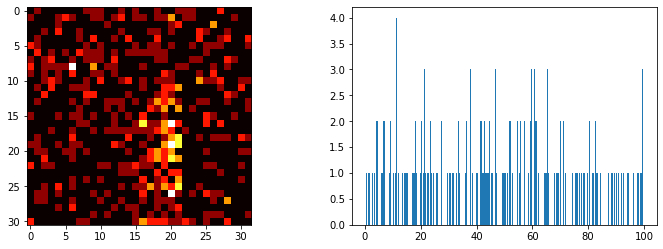

Koordinaten: (116, 90), (137, 169)
Bereich bestätigt


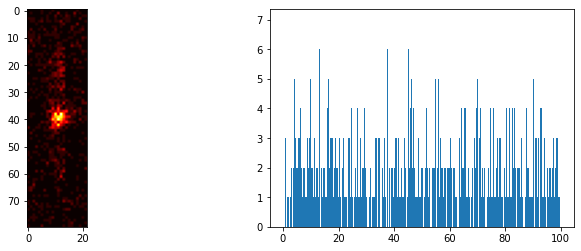

Koordinaten: (130, 89), (184, 152)
Bereich bestätigt


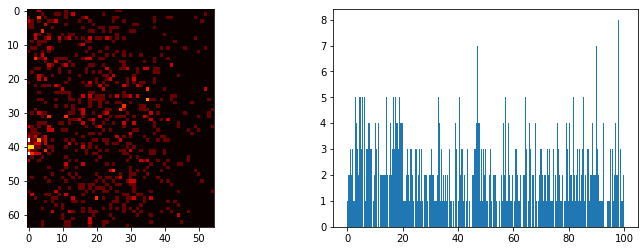

Koordinaten: (27, 56), (142, 186)
Bereich bestätigt


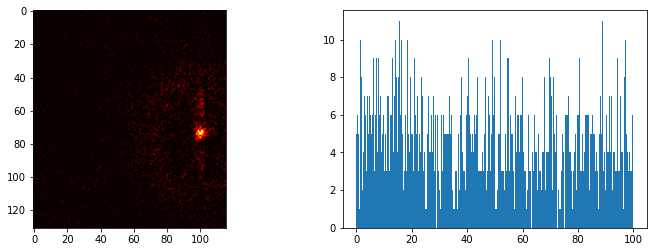

In [1]:
# Importieren Sie die benötigten Module
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from pathlib import Path

# Erstellen Sie ein Tkinter-Fenster
window = tk.Tk()
window.title("Bereich auswählen")

# Erstellen Sie ein Numpy-Array mit zufälligen Daten
data = np.random.rand(256, 256)

# Eingeben des Datenpfades
data_path = Path('C:\\Users\\domin\\OneDrive - TU Wien\\Proj Arbeit 1\\data\\datasets\\100s_3eV_slit_1eV_vis\\')

# Laden der Daten
data_toa = np.load(data_path / 'out_toa.npy')/10**13
data_matrix = np.load(data_path / 'out_xy.npy') 
data_bincoin = np.load(data_path / 'out_coincount.npy')
index_coin = np.load(data_path / 'out_coin.npy')

# Löschen der Hot pixels
hot_pixels = np.array([(116,199),(103,198),(76,166),(55,203),(121,97)])
data_bincoin[hot_pixels[:,1],hot_pixels[:,0]] = 0

data = data_bincoin

# Filtern Sie die Datenpunkte, die innerhalb des ausgewählten Bereichs liegen
x1, y1, x2, y2 = 0,0,255,255
selected_data = data[y1:y2+1, x1:x2+1]

# Creating matrix list
xrange = np.arange(x1,x2+1)
yrange = np.arange(y1,y2+1)
matrix_list = np.array([i*256 + j for i in xrange for j in yrange])
coin = index_coin[np.isin(data_matrix[index_coin],matrix_list)]

# Erstellen Sie eine neue Abbildung
fig = plt.figure(figsize=(8,8))

# Zeigen Sie das Bild mit plt.imshow an
plt.imshow(data)

canvas = FigureCanvasTkAgg (fig, window)
canvas.get_tk_widget ().pack ()

# Erstellen Sie eine Funktion, um die Koordinaten und Datenpunkte des ausgewählten Bereichs zu erhalten
def onselect(eclick, erelease):

    # eclick und erelease sind die Ereignisse an den Mausklick- und Freigabepositionen
    # Extrahieren Sie die Koordinaten des ausgewählten Bereichs
    global x1, x2, y1, y2
    x1, y1 = int(eclick.xdata), int(eclick.ydata)
    x2, y2 = int(erelease.xdata), int(erelease.ydata)

    # Drucken Sie die Koordinaten und Datenpunkte aus
    print(f"Koordinaten: ({x1}, {y1}), ({x2}, {y2})")

# Erstellen Sie eine Funktion, um den ausgewählten Bereich zu bestätigen und eine andere Funktion auszuführen
def confirm():

    # Führen Sie eine andere Funktion aus (hier nur ein Beispiel)
    print("Bereich bestätigt")

    show_image()

# Aktivieren Sie den Rechteckauswähler mit der onselect-Funktion
rs = RectangleSelector(fig.gca(), onselect)
plt.close()

# Erstellen Sie eine Funktion, um den ausgewählten Bereich zurückzusetzen und einen neuen Bereich zu wählen
def reset():

    global x1, x2, y1 ,y2
    x1, x2, y1, y2 = 0,0,255,255

    # Zeigen Sie das Bild erneut an
    show_image()

# Erstellen Sie eine Funktion, um das Bild anzuzeigen und den Rechteckauswähler zu aktivieren
def show_image():

    # Erstellen Sie eine Matplotlib-Figur
    fig, ax = plt.subplots(1,2,figsize=(12,4))

    # Erstellen Sie eine Leinwand, um die Figur im Fenster anzuzeigen
    canvas = FigureCanvasTkAgg (fig, window)

    # Creating matrix list
    xrange = np.arange(x1,x2+1)
    yrange = np.arange(y1,y2+1)
    matrix_list = np.array([i*256 + j for i in xrange for j in yrange])
    coin = index_coin[np.isin(data_matrix[index_coin],matrix_list)]
    selected_data = data[y1:y2+1, x1:x2+1]
    

    # Plotten der daten im ausgewählten Bereich
    ax[0].imshow(selected_data,cmap='hot')
    ax[1].hist(data_toa[coin],bins=500)

    plt.show()

    

# Erstellen Sie einen Button, um den ausgewählten Bereich zu bestätigen
confirm_button = tk.Button(window, text="Bestätigen", command=confirm)
confirm_button.pack()

# Erstellen Sie einen Button, um den ausgewählten Bereich zurückzusetzen
reset_button = tk.Button(window, text="Zurücksetzen", command=reset)
reset_button.pack()

# Starten Sie die Tkinter-Hauptschleife
window.mainloop()


# For old data sets 

In [25]:
import numpy as np
path = 'C:\\Users\\domin\\OneDrive - TU Wien\\Proj Arbeit 1\\präsi datasets\\datasets\\30s_2eV_slit_1eV_ava\\out_toa.npy'
e = np.load(path)
print(e)

[              0          265625         3578125 ... 299999908812500
 299999909000000 299999914062500]


In [26]:
import numpy as np
from npy_append_array import NpyAppendArray
from pathlib import Path
import os


pathe = 'C:\\Users\\domin\\OneDrive - TU Wien\\Proj Arbeit 1\\präsi datasets\\datasets\\30s_2eV_slit_1eV_ava'

path = Path(pathe)

##############################################################################################

data_path=path / 'data'
url = Path(path)
path_electrons = data_path / 'electrons'
path_photons = data_path / 'photons'

data_list_e = sorted(path_electrons.iterdir(), key=os.path.getmtime)
data_list_ph = sorted(path_photons.iterdir(), key=os.path.getmtime)

##############################################################################################

# Setup files for large data array
file_xy = url / 'out_xy.npy'
file_toa  = url / 'out_toa.npy'
file_ph = url / 'out_ph.npy'

npaa_xy = NpyAppendArray(file_xy,delete_if_exists=True)
npaa_toa = NpyAppendArray(file_toa,delete_if_exists=True)
npaa_ph = NpyAppendArray(file_ph,delete_if_exists=True)


# Convert files: load -> sort by toa -> append  
e_offset = 0
for file in data_list_e:

    arr_toa = np.load(str(file))[1]
    arr_xy = np.load(str(file))[0]
    index = arr_toa[:].argsort()

    if e_offset == 0:
        e_offset = arr_toa[index[0]]

    npaa_xy.append(arr_xy[:][index])
    npaa_toa.append(((arr_toa[:][index]-e_offset)*15625))

arr1 = np.load(str(data_list_ph[0]))
if arr1.shape[0] > 0:
    arr1*=10

arr2 = np.load(str(data_list_ph[1]))
if arr2.shape[0]>0:
    arr2*=10
arr = np.concatenate((arr1, arr2))
arr = arr[arr>0]
npaa_ph.append(np.sort(arr))

npaa_xy.close()
npaa_toa.close()
npaa_ph.close()

In [24]:
import numpy as np
from npy_append_array import NpyAppendArray
path_list = [x for x in Path('C:\\Users\\domin\\OneDrive - TU Wien\\Proj Arbeit 1\\präsi datasets\\datasets').iterdir() if x.is_dir()]

for path in path_list:

    ##############################################################################################

    data_path=path / 'data'
    url = Path(path)
    path_electrons = data_path / 'electrons'
    path_photons = data_path / 'photons'

    data_list_e = sorted(path_electrons.iterdir(), key=os.path.getmtime)
    data_list_ph = sorted(path_photons.iterdir(), key=os.path.getmtime)

    ##############################################################################################

    # Setup files for large data array
    file_xy = url / 'out_xy.npy'
    file_toa  = url / 'out_toa.npy'
    file_ph = url / 'out_ph.npy'

    npaa_xy = NpyAppendArray(file_xy,delete_if_exists=True)
    npaa_toa = NpyAppendArray(file_toa,delete_if_exists=True)
    npaa_ph = NpyAppendArray(file_ph,delete_if_exists=True)


    # Convert files: load -> sort by toa -> append  
    e_offset = 0
    for file in data_list_e:

        arr_toa = np.load(str(file))[1]
        arr_xy = np.load(str(file))[0]
        index = arr_toa[:].argsort()

        if e_offset == 0:
            e_offset = arr_toa[index[0]]

        npaa_xy.append(arr_xy[:][index])
        npaa_toa.append(((arr_toa[:][index]-e_offset)*15625))

    arr1 = np.load(str(data_list_ph[0]))
    if arr1.shape[0] > 0:
        arr1*=10

    arr2 = np.load(str(data_list_ph[1]))
    if arr2.shape[0]>0:
        arr2*=10
    arr = np.concatenate((arr1, arr2))
    arr = arr[arr>0]
    npaa_ph.append(np.sort(arr))

    npaa_xy.close()
    npaa_toa.close()
    npaa_ph.close()
